### Data Dictionary

age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

# Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\Preeti\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Imports dataset
df= pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#shows first five rows of data
df.shape

(303, 14)

In [4]:
#Provides summary of the DataFrame, including column names, data types, and the number of non-null values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Summary Statistics
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Calculates and returns the correlation matrix for the numerical columns in the DataFrame, showing the pairwise correlations between the variables.
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [7]:
# Checking for duplicates
df.duplicated().sum()

1

In [8]:
# View duplicate
df.loc[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df.loc[163:164]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
# Drops duplicates
df= df.drop_duplicates()

In [11]:
# Sets the indices in order
df= df.reset_index(drop=True)

In [12]:
df.loc[163:164]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


In [13]:
# Separating the columns in categorical and continuos values
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [14]:
df.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Exploratory Data Analysis

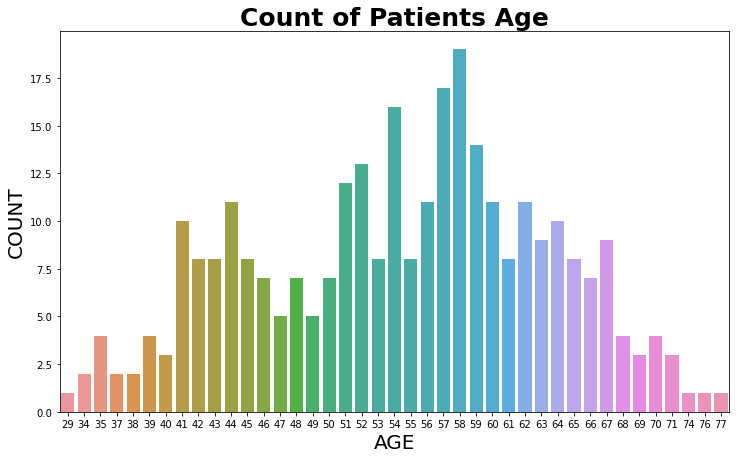

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(x='age',data=df)
plt.title('Count of Patients Age',fontsize=25, fontweight='bold')
plt.xlabel('AGE',fontsize=20)
plt.ylabel('COUNT',fontsize=20)
plt.show()

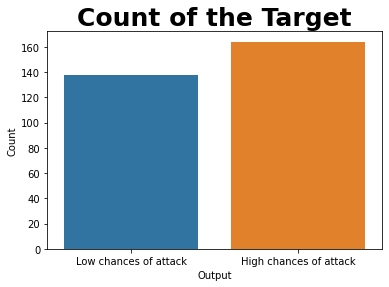

In [16]:
# Set up the plot
plt.figure(figsize=(6, 4))

# Create the count plot for the target
sns.countplot(x='output', data=df)

# Replace the x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['Low chances of attack', 'High chances of attack'])

# Set the plot title and axis labels
plt.title('Count of the Target', fontsize=25, fontweight='bold')
plt.xlabel('Output')
plt.ylabel('Count')

# Show the plot
plt.show()


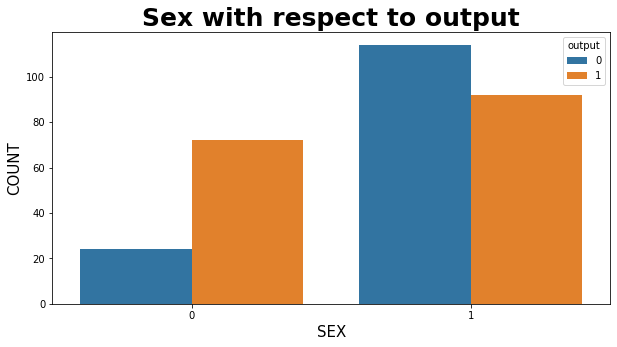

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex',hue='output',data=df)
plt.title('Sex with respect to output',fontsize=25, fontweight='bold')
plt.xlabel('SEX',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.show()

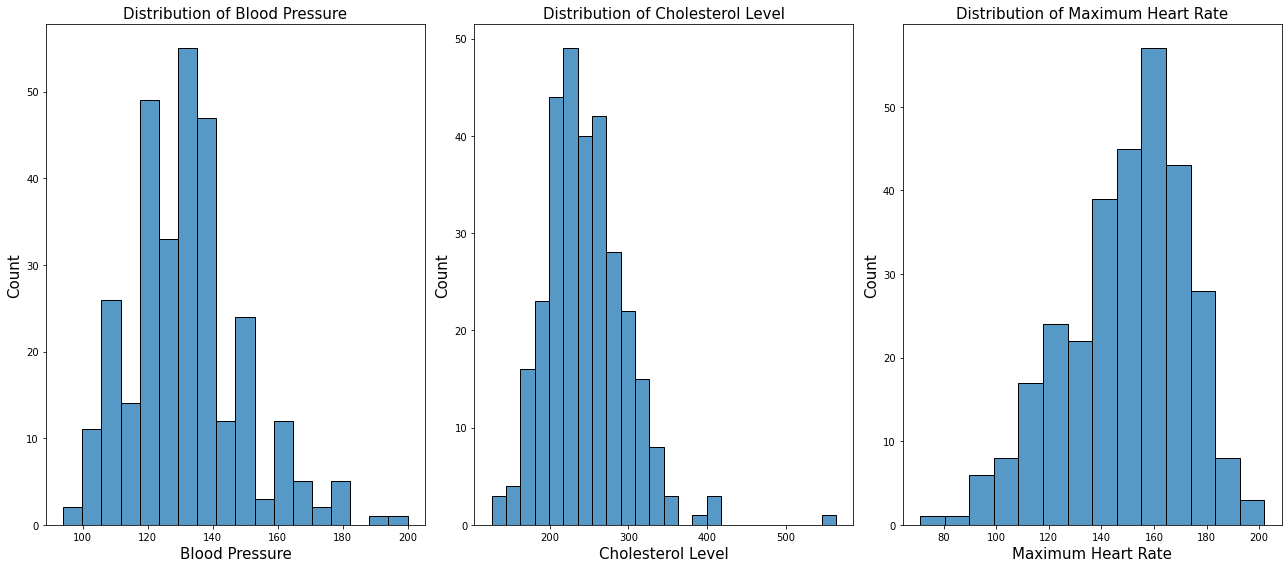

In [18]:
# Set up the subplot grid
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))

# Plot the distribution of blood pressure
sns.histplot(x='trtbps', data=df, ax=axes[0])
axes[0].set_title('Distribution of Blood Pressure', fontsize=15)
axes[0].set_xlabel('Blood Pressure', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)

# Plot the distribution of cholesterol level
sns.histplot(x='chol', data=df, ax=axes[1])
axes[1].set_title('Distribution of Cholesterol Level', fontsize=15)
axes[1].set_xlabel('Cholesterol Level', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)

# Plot the distribution of maximum heart rate
sns.histplot(x='thalachh', data=df, ax=axes[2])
axes[2].set_title('Distribution of Maximum Heart Rate', fontsize=15)
axes[2].set_xlabel('Maximum Heart Rate', fontsize=15)
axes[2].set_ylabel('Count', fontsize=15)

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


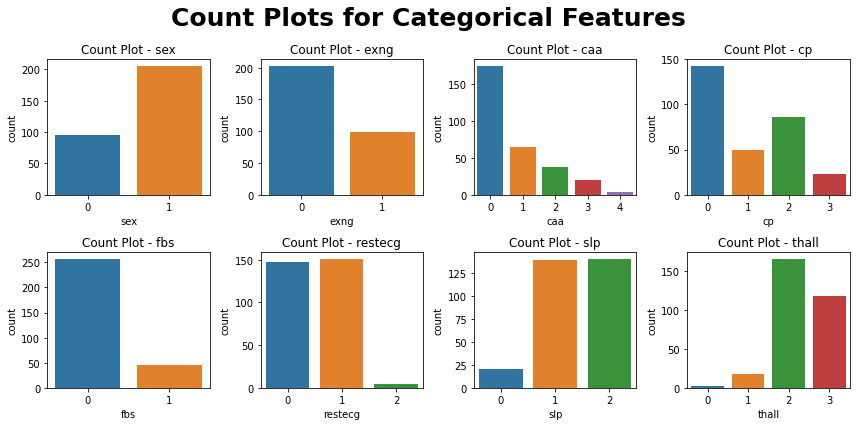

In [19]:
# Set up the plot grid
num_rows = 2
num_cols = (len(cat_cols) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6))

# Iterate over each categorical feature and create count plots
for i, feature in enumerate(cat_cols):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Count Plot - {feature}')
# Add a heading on top of the plots
fig.suptitle('Count Plots for Categorical Features', fontsize=25, fontweight='bold')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


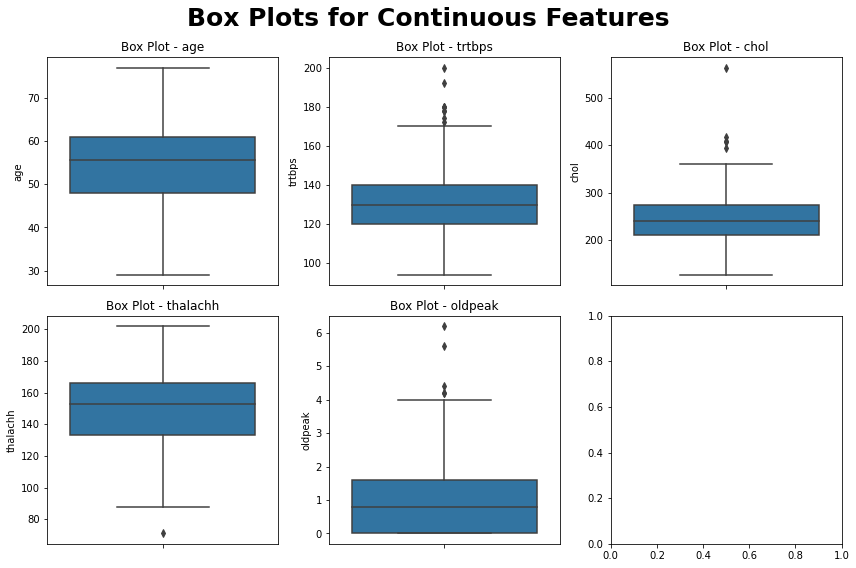

In [20]:
num_rows = 2
num_cols = (len(con_cols) + 1) // 2

# Set up the plot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Iterate over each continuous feature and create box plots
for i, feature in enumerate(con_cols):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot - {feature}')

# Add a heading on top of the plots
fig.suptitle('Box Plots for Continuous Features', fontsize=25, fontweight='bold')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


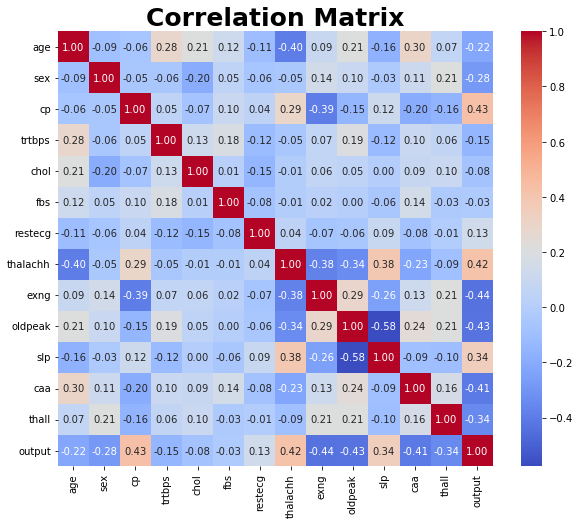

In [21]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=25, fontweight='bold')

# Show the plot
plt.show()


# Conclusions from the Exploratory Data Analysis (EDA)

After conducting the Exploratory Data Analysis (EDA) on the given dataset, we have gained several valuable insights. Let's summarize our findings:

1. **No missing values**: The dataset is complete, with no missing or NaN values. This is great news as it allows us to proceed with the analysis without the need for imputation or data cleansing.

2. **Presence of outliers**: We have identified the presence of outliers in all the continuous features. Outliers can significantly impact the performance of models and statistical analyses, so it is crucial to handle them appropriately during the data preprocessing stage.

3. **Sex distribution**: It is worth noting that the dataset exhibits a significant imbalance in the distribution of sexes. Specifically, there are more than twice as many individuals with sex = 1 compared to sex = 0. This imbalance should be taken into consideration when developing predictive models to ensure unbiased and accurate results.

4. **Lack of apparent linear correlation**: The heatmap analysis suggests that there is no significant linear correlation between the continuous variables in the dataset. This implies that the variables are not strongly related to each other in a linear fashion. Alternative methods, such as non-linear modeling techniques, may need to be explored to capture any hidden relationships.

5. **Potential correlations with output**: The scatterplot heatmap matrix provides some indications of potential correlations between certain variables and the output. Specifically, there might be correlations between the output and variables such as cp (chest pain type), thalachh (maximum heart rate achieved), and slp (slope of the peak exercise ST segment). Further investigation and statistical testing are required to confirm these relationships.

6. **Age and heart attack**: While it may seem intuitive that older people are more likely to experience heart attacks, the distribution plot of age with respect to the output reveals a more complex relationship. The plot shows that age alone is not a reliable predictor of heart attack risk, indicating that other factors play a significant role in determining the likelihood of a heart attack.

7. **Maximum heart rate and heart attack**: The distribution plot of thalachh (maximum heart rate achieved) with respect to the output provides valuable insights. It suggests that individuals with higher maximum heart rates achieved tend to have a higher chance of experiencing a heart attack. This variable could be a valuable feature in predicting heart attack risk.

8. **Previous peak and heart attack**: The distribution plot of oldpeak (previous peak) with respect to the output indicates that individuals with lower previous peak values have a higher likelihood of experiencing a heart attack. This finding suggests that the magnitude of change in the ST segment during exercise could be a crucial factor in predicting heart attack risk.

9. **Key factors for heart attack prediction**: The plot 3.2.4 highlights several key factors associated with a higher chance of heart attack. These factors include:
   - Non-Anginal chest pain (cp = 2)
   - Absence of major vessels (caa = 0)
   - Male gender (sex = 1)
   - Thalassemia type 2 (thall = 2)
   - No exercise-induced angina (exng = 0)

In conclusion, the EDA has provided valuable insights into the dataset. By understanding the relationships between variables and their impact on heart attack risk, we can build more accurate predictive models and develop targeted interventions for individuals at higher risk of heart attacks.


# Data Modeling

In [22]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
print('Packages imported...')

Packages imported...


In [23]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.576923,0.75,-0.117647,-0.076336,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.423077,0.00,0.149020,1.053435,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.115385,0.00,-0.572549,0.595420,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.038462,-0.50,-0.070588,0.778626,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.115385,-0.50,1.780392,0.320611,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [24]:
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (241, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (241,)
The shape of y_test is        (61,)


## SVM

In [25]:
classifier = SVC(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.get_params

<bound method BaseEstimator.get_params of SVC(random_state=0)>

In [26]:
param = [
  {
      'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 
       'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
       'gamma' :[1, 0.1, 0.01, 0.001, 0.0001,'scale','auto']
   },
 ]
grid_clf = GridSearchCV(classifier, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [27]:
classifier = SVC(kernel='rbf',gamma='scale',C=1.445,random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[28  1]
 [ 5 27]]


0.9016393442622951

In [29]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 92.95%
Test Accuracy  : 90.16%


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [31]:
# K-fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.73 %
Standard Deviation: 5.03 %


### Logistic Regression

In [32]:
lr_clf = LogisticRegression(random_state = 0,max_iter=1000)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,lr_clf.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print(lr_clf.get_params)

Train Accuracy : 87.14%
Test Accuracy  : 90.16%
<bound method BaseEstimator.get_params of LogisticRegression(max_iter=1000, random_state=0)>


In [33]:
param = [
  {'solver': ['newton-cg', 'lbfgs', 'liblinear','saga'],
   'penalty':['l2','l1','elasticnet'],
    'C':[ 100,10, 1.0, 0.1, 0.01,0.0001],
   'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
   },
 ]
grid_clf = GridSearchCV(lr_clf, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

{'C': 10, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [34]:
clf = LogisticRegression(C = 1.0 ,solver='saga',penalty='elasticnet',l1_ratio=0.2,max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
# False negetives = False positives

[[27  2]
 [ 4 28]]


0.9016393442622951

In [36]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,clf.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 87.55%
Test Accuracy  : 90.16%


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [38]:
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.40 %
Standard Deviation: 4.57 %


### KNN

In [39]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier()>

In [40]:
param = [
  {
      'n_neighbors':[1,3,5,7,9,11,13,15],
      'weights':['uniform', 'distance'],
      'metric' : ['euclidean','manhattan','minkowski'], 
      'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'],
      'p':[1,2],
   },
 ]
grid_clf = GridSearchCV(classifier, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 15,
 'p': 1,
 'weights': 'uniform'}

In [41]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric='manhattan' ,weights = 'uniform', p = 1,algorithm= 'auto')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [42]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 87.14%
Test Accuracy  : 83.61%


In [43]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
# False negetive < False positives

[[24  5]
 [ 5 27]]


0.8360655737704918

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [45]:
# K-fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.92 %
Standard Deviation: 6.22 %


## Decision Tree

In [46]:
#Model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', random_state=0)>

In [47]:
# Grid Search CV
param = [
  {
      'criterion':['gini', 'entropy'], 
      'splitter':['best', 'random'],
      'max_depth':[3,None],
      'max_features':[1,2,3,4,5,6,7,8,9,'auto','sqrt','log2',None],
      'min_samples_leaf': [1,2,3,4,5,6,7,8,9],
   },
 ]
grid_clf = GridSearchCV(classifier, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 4,
 'min_samples_leaf': 8,
 'splitter': 'random'}

In [48]:
# Fitting the model
classifier = DecisionTreeClassifier(criterion = 'gini',max_depth=10,max_features=5,min_samples_leaf=3,splitter='best', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [49]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 87.97%
Test Accuracy  : 65.57%


In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[20  9]
 [12 20]]


In [51]:
# Classification Report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.69      0.62      0.66        32

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61



In [52]:
# K-fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.80 %
Standard Deviation: 10.28 %


## Random Forest

In [53]:
# Model
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,bootstrap=False)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=10,
                       random_state=0)>

In [54]:
# Random Hyperparameter Grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [55]:
# Random Search Training
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3,
                               verbose=2, random_state=42,
                               n_jobs = -1)
rf_random.fit(X_train,y_train)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [56]:
classifier = RandomForestClassifier(bootstrap=True,max_depth=10,n_estimators = 400, criterion = 'entropy', random_state = 0,max_features='sqrt',min_samples_leaf=4,min_samples_split=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [57]:
# Train,Test Accuracy
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 90.46%
Test Accuracy  : 83.61%


In [58]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[24  5]
 [ 5 27]]


In [59]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [60]:
# K Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.47 %
Standard Deviation: 6.61 %


## Results
<table>
<tr>
    <th>MODEL</th>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
</tr>

<tr>
    <th scope="row">Logistic Regression</th>
    <td>87.55%</td>
    <td>90.16%</td>
    <td>83.40%</td>
    <td>4.57%</td>
    <td>0.90</td>
    <td>0.90</td>
</tr>

<tr>
    <th scope="row" > KNN </th>
    <td>87.14%</td>
    <td>83.61%</td>
    <td>80.92%</td>
    <td>6.22%</td>
    <td>0.83</td>
    <td>0.84</td>
</tr>

<tr>
    <th scope="row" > SVM </th>
    <td>92.95%</td>
    <td>90.16%</td>
    <td>81.73%</td>
    <td>5.03%</td>
    <td>0.90</td>
    <td>0.90</td>
</tr>
<tr>
    <th scope="row" > Decision Tree </th>
    <td>87.97%</td>
    <td>65.57%</td>
    <td>71.80%</td>
    <td>10.28%</td>
    <td>0.66</td>
    <td>0.66</td>
</tr>

<tr>
    <th scope="row" > Random Forest</th>
    <td>90.46%</td>
    <td>83.61%</td>
    <td>80.47%</td>
    <td>6.61</td>
    <td>0.83</td>
    <td>0.84</td>
</tr>

</table>
